In [ ]:
import torch
import torch.nn as nn
import torch.functional as F


In [ ]:
import torch.nn.functional as F

In [ ]:
#Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # input layer (4 features of the Iris flower)
  # Hidden layer H1 (No. of neurons) #
  # H2 (N)
  # Output (3 classes of Iris flowers)
  def __init__(self, in_features=4, H1=8, H2=89, out_features=3):
    super().__init__()                                                            #inititate nn.Module
  self.fc1 = nn.linear(in_features, H1)                                           #fc-->fully conncted
  self.fc2 = nn.linear(H1, H2)
  self.out = nn.linear(H2, out_features)

  def forward(self, x):                                                           # to move everything forward we have defined a variable x
  x = F.relu(self.fc1(x))                                                         # Rectified linear unit function
  x = F.relu(self.fc2(x))                                             #--> Do something. if the output<0, call it 0, otherwise use the output value
  x = self.out(x)

return x

#Pick a manual seed for randomization
torch.manual_seed (21)
model = Model()


IndentationError: expected an indented block after function definition on line 13 (<ipython-input-45-fdc3f4c73473>, line 14)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self, in_features=4, H1=8, H2=89, out_features=3):
        super(Model, self).__init__()  # Correcting super() call indentation
        self.fc1 = nn.Linear(in_features, H1)  # Correcting capitalization to nn.Linear
        self.fc2 = nn.Linear(H1, H2)  # Correcting capitalization to nn.Linear
        self.out = nn.Linear(H2, out_features)  # Correcting capitalization to nn.Linear

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Correcting indentation
        x = F.relu(self.fc2(x))  # Correcting indentation
        x = self.out(x)
        return x

# Pick a manual seed for randomization
torch.manual_seed(21)
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
my_df.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [ ]:
my_df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
#Changed the last column from strings to int
my_df['species'] = my_df['species'].replace('setosa', 0)
my_df['species'] = my_df['species'].replace('versicolor', 1)
my_df['species'] = my_df['species'].replace('virginica', 2)

In [ ]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
#Train, test, split! Set a,b  Variables that will store the split values
a = my_df.drop('species', axis=1)          #We are training our model to predict species on the basis on 4 features
b = my_df['species']                       # Species--> Output variable; so we have split the dataset as input/output variables

In [ ]:
#Convert these into numpy arrays
a = a.values
b = b.values

In [ ]:
a

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Train Test Split
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size=0.2, random_state=21)
#Test size 20%-->0.2, so Pytorch knows that the rest, training size, is 80%


In [ ]:
#Convert a features to float tensors
a_train = torch.FloatTensor(a_train)  # Float bcz the numbers in the array are decimals
a_test = torch.FloatTensor(a_test)

#Convert b labels to float tensors long
b_train = torch.LongTensor(b_train)
b_test = torch.LongTensor(b_test)
# Long tensors are 64bit integers


In [ ]:
# Set the criterion of model to measure the error
# How far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
import torch.optim as optim
# Choose Adam Optimizer
# lr = Learning rate (if error doesn't go down after a bunch of iterations (epochs), lower the learning rate)
optimizer= optim.Adam(model.parameters(),lr=0.01)        #lower the lr, the longer it takes for the model to learn



In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=89, bias=True)
  (out): Linear(in_features=89, out_features=3, bias=True)
)>

In [ ]:
#Train the model
# Epochs --> (one run through all the train data in our network)
#epochs = 200
# Tracking our losses/errors. We want our losses to decrease over time. It means that the model is learning.
#losses = []     #variable 'losses' is a python list
# for i in range(epochs):
 #Go forward and get a prediction
 #    b_pred = model.forward(a_train)  # Get prediction result
 #Measure the loss/error, will be high at first
 #    loss = criterion(b_pred, b_train)  #loss = diff between prediction and actual data
 #Keep track of our losses
 #losses = append(loss.detach().numpy())   #losses is the python list we defined earlier
  #losses.append(loss.item())
 #Print every 10 epoch
 #if i % 10 == 0:
  #print(f'Epoch: {i} and loss: {loss}')
   #print(f'Epoch: {i} and loss: {loss.item()}')
       # Keep track of our losses
  #   losses.append(loss.item())  # Append the loss value to the list (using .item() to get a scalar)
    # Print every 10 epochs
   #   if i % 10 == 0:
    #    print(f'Epoch: {i} and loss: {loss.item()}')  # Print loss using .item() to get a scalar

    # Do backpropagation: Take the error rate of forward propagation
    # Feed it back through the network to fine-tune the weights
   # optimizer.zero_grad()  # Zero the gradients before running the backward pass
   # loss.backward()  # Backpropagation: Compute gradients of the loss with respect to model parameters
  # optimizer.step()  # Perform a single optimization step (parameter update)




IndentationError: unindent does not match any outer indentation level (<tokenize>, line 26)

In [ ]:
# Set the criterion of model to measure the error
# How far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
import torch.optim as optim
# Choose Adam Optimizer
# lr = Learning rate (if error doesn't go down after a bunch of iterations (epochs), lower the learning rate)
optimizer= optim.Adam(model.parameters(),lr=0.01)        #lower the lr, the longer it takes for the model to learn

#Train our model
epochs = 100
losses = []
for i in range(epochs):
  b_pred = model.forward(a_train)
  loss = criterion(b_pred, b_train)
  losses.append(loss.detach().numpy())       # loss would be a tensor, convert as numpy
  if i % 10 == 0:
    print (f'Epoch {i} and loss: {loss}')

  # Do backpropagation: Take the error rate of forward propagation
  # Feed it back through the network to fine-tune the weights
  optimizer.zero_grad()  # Zero the gradients before running the backward pass
  loss.backward()  # Backpropagation: Compute gradients of the loss with respect to model parameters
  optimizer.step()  # Perform a single optimization step (parameter update)





Epoch 0 and loss: 1.2007031440734863
Epoch 10 and loss: 0.45175403356552124
Epoch 20 and loss: 0.19326886534690857
Epoch 30 and loss: 0.081488236784935
Epoch 40 and loss: 0.05032656714320183
Epoch 50 and loss: 0.038142722100019455
Epoch 60 and loss: 0.03128211572766304
Epoch 70 and loss: 0.02738262340426445
Epoch 80 and loss: 0.025520553812384605
Epoch 90 and loss: 0.02440936490893364


Text(0.5, 0, 'Epoch')

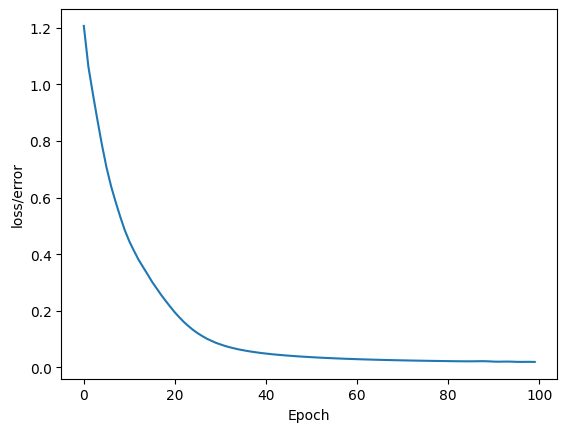

In [ ]:
#Create graph
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [ ]:
#Evaluate Model on Test dataset (Model Validation)
with torch.no_grad():                     #turn off back propagation
  b_eval = model.forward(a_test)          #a_test are features from our test set
                                          # y_eval are predictions
  loss = criterion(b_eval, b_test)        # Find loss: prediction vs test set value


In [ ]:
loss


tensor(0.4133)

In [63]:
# The diff of the above loss and loss in the training data we found above is high
correct = 0
wrong = 0
with torch.no_grad():
  for i, data in enumerate(a_test):
    b_val = model.forward(data)  # Will tell what flower type our NN think it is
    print( f'{i+1}.) {str(b_val)} \t {b_test[i]} \t {b_val.argmax().item()}')
    # Prediction is correct or not
    if b_val.argmax().item() == b_test[i]:
      correct +=1
wrong = len(a_test)-correct
print(f'We got {correct} correct')
print(f'Only {wrong} wrong values')

1.) tensor([-0.7890,  7.9599, -5.9635]) 	 1 	 1
2.) tensor([ 19.2361,  12.3942, -31.8744]) 	 0 	 0
3.) tensor([ 20.5286,  12.4157, -33.4610]) 	 0 	 0
4.) tensor([ 20.8695,  12.5995, -34.0050]) 	 0 	 0
5.) tensor([-1.0527,  7.9075, -5.7039]) 	 1 	 1
6.) tensor([-1.2508,  8.6596, -6.1345]) 	 1 	 1
7.) tensor([ 20.4888,  12.8797, -33.7300]) 	 0 	 0
8.) tensor([-11.3695,   0.4220,   9.3342]) 	 2 	 2
9.) tensor([ 19.2534,  12.0753, -31.6777]) 	 0 	 0
10.) tensor([ 21.3476,  12.8301, -34.7314]) 	 0 	 0
11.) tensor([ 0.9030,  8.4052, -8.0007]) 	 1 	 1
12.) tensor([-1.2149,  7.6220, -5.3435]) 	 1 	 1
13.) tensor([-15.0121,  -0.6737,  13.2862]) 	 2 	 2
14.) tensor([-16.0223,   0.1757,  13.6118]) 	 2 	 2
15.) tensor([ 18.2352,  11.9268, -30.3392]) 	 0 	 0
16.) tensor([-6.8692,  4.9865,  1.7862]) 	 1 	 1
17.) tensor([-7.9303,  3.4299,  3.9556]) 	 2 	 2
18.) tensor([-4.1119,  6.3111, -1.6796]) 	 1 	 1
19.) tensor([ 25.4055,  14.4711, -40.8058]) 	 0 	 0
20.) tensor([-11.9008,   0.2859,   9.9061]) 	

In [59]:
new_iris = torch.tensor([2.3, 4.5, 1.5, 0.5])
with torch.no_grad():
  print (model(new_iris))


tensor([ 13.8195,   8.9365, -22.8181])


In [64]:
new_iris = torch.arange([4])


TypeError: arange(): argument 'end' (position 1) must be Number, not list

In [66]:
new_iris = torch.tensor([1.45, 5.65, 3.54, 2.4])
with torch.no_grad():
  print (model(new_iris))


tensor([-2.4620,  3.5720, -1.1028])
